In [1]:
import sys

sys.path.insert(1, 'C:/Users/peter/Desktop/volatility-forecasting/midas')

from volatility import GARCH_MIDAS_sim
import pandas as pd
import numpy as np
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

# GARCH-MIDAS Model

### Specification

Let's denote $r_{i,t}$ with the daily logarithm of the returns, where the index t = 1,...,T refers to month periods and the index i = 1,...,$I_t$ to days within month. Assume 
$r_{i,t} = \mu + \epsilon_{i,t}^2$
for the returns. 
$$\epsilon_{i,t} = \sqrt{\tau_t g_{i,t}} Z_{i,t} \tag{1}$$
where $\tau_t$ is the long-term component, $g_{i,t}$ refers to the short-term component of volatility and $Z_{i,t}$ is assumed to be i.i.d and normally distributed with mean zero and variance one. Let $\mathcal{F_{i,t}}$ denote the filtration up to day i in period t. If $\tau_t$ specified as a function of low-frequency explanatory variables $X_t$, $\tau_t$ is the lagged values of $X_t$, then 
$$\sigma_{i,t}^2 = \tau_t g_{i,t} \tag{2}$$ 
is the conditional variance of the daily returns, that is $\sigma_{i,t}^2 = Var(\epsilon_{i,t} | \mathcal F_{i - 1,t})$. The short-term component varies daily, whereas the long-term componet varies monthly. $\tau_t$ is constant throughout months. The short-term component is defined as a GARCH(1, 1) process: 
$$g_{i,t} = 1 - \alpha - \beta + \alpha \frac{\epsilon_{i-1, t}^2}{\tau_t} + \beta g_{i-1, t} \tag{3}$$
**Assumption 1.** Let $Z_{i,t}$ be i.i.d with $E[Z_{i,t}] = 0, E[Z_{i,t}^2] = 1$, and $1 < k < \infty$, where $k = E[Z_{i,t}^4]$.<br>
**Assumption 2.** We assume that $\alpha > 0, \beta >= 0$ and $\alpha + \beta < 1$

We specify $\tau_t$ as a positive-valued function of the present and K $\geqslant$ 1 lagged value of the explanatory variable $X_t$:
$$\tau_t = exp(m + \theta \sum_{k=1}^K \varphi_k (w_1, w_2) X_{t-k}) \tag{4}$$
where $\varphi_k$ is the Beta Lag Function, specified at MIDAS model specification. As $X_t$ can take positive or negative values, it was a vital choose to take the exponancial of the $\tau_t$

In [2]:
def create_sim(lag = 36, params = [0.0, 0.06, 0.91, 0.1, 0.3, 4.0, 0.9, 0.09], sim_num = 500, sim_length = 240, plot = False):
    lls, mu, alpha, beta, m, theta, w, runtime = np.zeros(sim_num), np.zeros(sim_num), np.zeros(sim_num), np.zeros(sim_num), np.zeros(sim_num), np.zeros(sim_num), np.zeros(sim_num), np.zeros(sim_num)
    model = GARCH_MIDAS_sim(lag = lag, plot = plot)
    
    for i in range(sim_num):
        np.random.seed(i)
        X, y, _, _, _ = model.simulate(params = params, lag = lag, num = sim_length)
        start = time.time()
        model.fit(['', '01' ,'01' ,'pos', 'pos', 'pos'], X, y)
        runtime[i] = time.time() - start
        
        print("{}st iteration's runTime: {} sec.\n".format(i+1, round(runtime[i], 4)))
        lls[i] = model.opt.fun
        mu[i] = model.optimized_params[0]
        alpha[i] = model.optimized_params[1]
        beta[i] = model.optimized_params[2]
        m[i] = model.optimized_params[3]
        theta[i] = model.optimized_params[4]
        w[i] = model.optimized_params[5] 
    
    return lls, mu, alpha, beta, m, theta, w , runtime

In [4]:
sim500 = pd.DataFrame(create_sim())

1st iteration's runTime: 5.6325 sec.

2st iteration's runTime: 5.9459 sec.

3st iteration's runTime: 7.5234 sec.

4st iteration's runTime: 3.7937 sec.

5st iteration's runTime: 5.8671 sec.



C:/Users/peter/Desktop/volatility-forecasting/midas\volatility.py:476: RuntimeWarning: overflow encountered in double_scalars
  self.g[i] = (1 - alpha1 - beta1) + alpha1 * ((y[i - 1] - mu) ** 2) / self.tau[j - 1] + beta1 *self.g[i - 1]


6st iteration's runTime: 14.0664 sec.

7st iteration's runTime: 6.9342 sec.

8st iteration's runTime: 5.7631 sec.

9st iteration's runTime: 5.3378 sec.



C:\Users\peter\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


10st iteration's runTime: 3.0794 sec.

11st iteration's runTime: 6.7381 sec.

12st iteration's runTime: 5.6096 sec.

13st iteration's runTime: 5.7826 sec.

14st iteration's runTime: 7.6369 sec.

15st iteration's runTime: 6.2959 sec.

16st iteration's runTime: 7.7847 sec.

17st iteration's runTime: 4.664 sec.

18st iteration's runTime: 1.6389 sec.

19st iteration's runTime: 1.5854 sec.

20st iteration's runTime: 6.9906 sec.

21st iteration's runTime: 6.4534 sec.

22st iteration's runTime: 4.971 sec.

23st iteration's runTime: 2.8367 sec.

24st iteration's runTime: 7.5425 sec.

25st iteration's runTime: 3.6989 sec.

26st iteration's runTime: 7.0879 sec.

27st iteration's runTime: 6.1471 sec.

28st iteration's runTime: 6.95 sec.

29st iteration's runTime: 4.179 sec.

30st iteration's runTime: 5.1279 sec.

31st iteration's runTime: 4.3695 sec.

32st iteration's runTime: 3.5571 sec.

33st iteration's runTime: 13.1216 sec.

34st iteration's runTime: 8.9158 sec.

35st iteration's runTime: 5.0

C:/Users/peter/Desktop/volatility-forecasting/midas\base.py:47: RuntimeWarning: overflow encountered in exp
  g[i] = np.exp(param_trans[i])


86st iteration's runTime: 8.7702 sec.

87st iteration's runTime: 5.038 sec.

88st iteration's runTime: 7.8427 sec.

89st iteration's runTime: 5.9517 sec.

90st iteration's runTime: 4.4436 sec.

91st iteration's runTime: 4.199 sec.

92st iteration's runTime: 5.9999 sec.

93st iteration's runTime: 3.8431 sec.

94st iteration's runTime: 4.2844 sec.

95st iteration's runTime: 3.646 sec.

96st iteration's runTime: 3.9332 sec.

97st iteration's runTime: 5.3537 sec.

98st iteration's runTime: 7.0396 sec.

99st iteration's runTime: 7.7415 sec.

100st iteration's runTime: 3.8755 sec.

101st iteration's runTime: 4.0766 sec.

102st iteration's runTime: 11.3426 sec.

103st iteration's runTime: 7.4399 sec.

104st iteration's runTime: 5.0958 sec.

105st iteration's runTime: 3.5399 sec.

106st iteration's runTime: 4.2044 sec.

107st iteration's runTime: 5.3724 sec.

108st iteration's runTime: 6.9642 sec.

109st iteration's runTime: 3.9371 sec.

110st iteration's runTime: 1.2322 sec.

111st iteration'

C:/Users/peter/Desktop/volatility-forecasting/midas\stats.py:35: RuntimeWarning: divide by zero encountered in log
  lls = -0.5 * (np.log(2*np.pi) + np.log(sigma2) + resid ** 2 / sigma2)
C:/Users/peter/Desktop/volatility-forecasting/midas\stats.py:35: RuntimeWarning: divide by zero encountered in true_divide
  lls = -0.5 * (np.log(2*np.pi) + np.log(sigma2) + resid ** 2 / sigma2)
C:/Users/peter/Desktop/volatility-forecasting/midas\stats.py:35: RuntimeWarning: invalid value encountered in add
  lls = -0.5 * (np.log(2*np.pi) + np.log(sigma2) + resid ** 2 / sigma2)


210st iteration's runTime: 3.8726 sec.

211st iteration's runTime: 5.111 sec.

212st iteration's runTime: 11.1481 sec.

213st iteration's runTime: 4.8423 sec.

214st iteration's runTime: 5.7115 sec.

215st iteration's runTime: 5.6879 sec.

216st iteration's runTime: 4.6534 sec.

217st iteration's runTime: 5.8557 sec.

218st iteration's runTime: 2.8036 sec.

219st iteration's runTime: 3.6123 sec.

220st iteration's runTime: 4.5069 sec.

221st iteration's runTime: 3.7495 sec.

222st iteration's runTime: 3.8547 sec.

223st iteration's runTime: 3.9627 sec.

224st iteration's runTime: 4.7037 sec.

225st iteration's runTime: 5.151 sec.

226st iteration's runTime: 4.4649 sec.

227st iteration's runTime: 3.4205 sec.

228st iteration's runTime: 6.2292 sec.

229st iteration's runTime: 7.4071 sec.

230st iteration's runTime: 5.481 sec.

231st iteration's runTime: 3.8436 sec.

232st iteration's runTime: 5.9588 sec.

233st iteration's runTime: 4.7034 sec.

234st iteration's runTime: 4.8247 sec.

23

C:/Users/peter/Desktop/volatility-forecasting/midas\volatility.py:465: RuntimeWarning: invalid value encountered in multiply
  self.tau = np.exp(m + theta *  Beta().x_weighted(X_t, [1.0, w]))


251st iteration's runTime: 8.4351 sec.

252st iteration's runTime: 4.9182 sec.

253st iteration's runTime: 4.7005 sec.

254st iteration's runTime: 5.416 sec.

255st iteration's runTime: 4.4768 sec.

256st iteration's runTime: 6.0929 sec.

257st iteration's runTime: 5.457 sec.

258st iteration's runTime: 5.0501 sec.

259st iteration's runTime: 3.5191 sec.

260st iteration's runTime: 5.0378 sec.

261st iteration's runTime: 5.8719 sec.

262st iteration's runTime: 4.9905 sec.

263st iteration's runTime: 3.0943 sec.

264st iteration's runTime: 5.2996 sec.

265st iteration's runTime: 6.4594 sec.

266st iteration's runTime: 9.2003 sec.

267st iteration's runTime: 1.2566 sec.

268st iteration's runTime: 6.3726 sec.

269st iteration's runTime: 4.82 sec.

270st iteration's runTime: 3.8491 sec.

271st iteration's runTime: 4.0842 sec.

272st iteration's runTime: 3.6149 sec.

273st iteration's runTime: 4.7738 sec.

274st iteration's runTime: 5.0487 sec.

275st iteration's runTime: 8.0145 sec.

276s

C:/Users/peter/Desktop/volatility-forecasting/midas\volatility.py:476: RuntimeWarning: invalid value encountered in double_scalars
  self.g[i] = (1 - alpha1 - beta1) + alpha1 * ((y[i - 1] - mu) ** 2) / self.tau[j - 1] + beta1 *self.g[i - 1]


381st iteration's runTime: 6.3893 sec.

382st iteration's runTime: 6.9038 sec.

383st iteration's runTime: 4.2347 sec.

384st iteration's runTime: 5.1085 sec.

385st iteration's runTime: 6.0217 sec.

386st iteration's runTime: 5.4412 sec.

387st iteration's runTime: 5.3241 sec.

388st iteration's runTime: 4.208 sec.

389st iteration's runTime: 4.7312 sec.

390st iteration's runTime: 4.4061 sec.

391st iteration's runTime: 4.1363 sec.

392st iteration's runTime: 4.1332 sec.

393st iteration's runTime: 4.4625 sec.

394st iteration's runTime: 5.5914 sec.

395st iteration's runTime: 2.773 sec.

396st iteration's runTime: 5.9989 sec.

397st iteration's runTime: 1.1293 sec.

398st iteration's runTime: 3.3639 sec.

399st iteration's runTime: 5.6775 sec.

400st iteration's runTime: 6.4778 sec.

401st iteration's runTime: 3.301 sec.

402st iteration's runTime: 5.7072 sec.

403st iteration's runTime: 6.0847 sec.

404st iteration's runTime: 2.8768 sec.

405st iteration's runTime: 5.2099 sec.

406

C:/Users/peter/Desktop/volatility-forecasting/midas\volatility.py:478: RuntimeWarning: overflow encountered in double_scalars
  sigma2[i] = self.g[i] * self.tau[j - 1]


442st iteration's runTime: 8.5403 sec.

443st iteration's runTime: 5.2524 sec.

444st iteration's runTime: 6.1108 sec.

445st iteration's runTime: 4.9938 sec.

446st iteration's runTime: 9.7343 sec.

447st iteration's runTime: 10.4733 sec.

448st iteration's runTime: 4.0518 sec.

449st iteration's runTime: 9.5398 sec.

450st iteration's runTime: 4.3935 sec.

451st iteration's runTime: 4.6931 sec.

452st iteration's runTime: 4.7981 sec.

453st iteration's runTime: 2.8644 sec.

454st iteration's runTime: 5.8019 sec.

455st iteration's runTime: 6.3337 sec.

456st iteration's runTime: 2.9453 sec.

457st iteration's runTime: 5.5104 sec.

458st iteration's runTime: 4.6729 sec.

459st iteration's runTime: 5.763 sec.

460st iteration's runTime: 4.3309 sec.

461st iteration's runTime: 4.6445 sec.

462st iteration's runTime: 5.5567 sec.

463st iteration's runTime: 4.6758 sec.

464st iteration's runTime: 5.2627 sec.

465st iteration's runTime: 3.5164 sec.

466st iteration's runTime: 5.0076 sec.



In [7]:
sim500 = sim500.T
sim500.to_csv('C:/Users/peter/Desktop/volatility-forecasting/results/gm_sim_240.csv')
sim500

,0,1,2,3,4,5,6,7
0,1.407515,-0.017150,0.050182,0.907077,7.770268e-07,0.333767,0.820633,5.632514
1,1.464306,0.017484,0.048229,0.927341,9.558540e-02,0.466646,11.085854,5.945863
2,1.441287,-0.014913,0.058357,0.914016,9.780013e-02,0.534307,58.651456,7.523434
3,1.424462,-0.038698,0.062340,0.898748,6.902435e-02,0.266749,1.258763,3.793668
4,1.397145,0.000507,0.062195,0.906786,5.664796e-03,0.471442,2.412147,5.867059
...,...,...,...,...,...,...,...,...
495,1.443659,-0.004114,0.050634,0.929254,5.074391e-02,1.226963,6.211945,4.996080
496,1.443704,-0.004411,0.050674,0.918755,7.333121e-02,0.224709,2.979610,4.043785
497,1.435279,-0.016700,0.063410,0.913784,2.463072e-01,0.717081,8.469016,5.533013
498,1.419259,0.005357,0.048650,0.919786,1.219724e-05,0.907386,1.056355,4.489393


In [8]:
sim500_des = sim500.describe()#.iloc[1:, :]
"""
sim500_des['Lls'] = sim500_des[0]
sim500_des['Mu'] = sim500_des[1]
sim500_des['Alpha'] = sim500_des[2]
sim500_des['Beta'] = sim500_des[3]
sim500_des['M'] = sim500_des[4]
sim500_des['Theta'] = sim500_des[5]
sim500_des['W'] = sim500_des[6]
sim500_des['RunTime'] = sim500_des[7]
sim500_des = sim500_des.iloc[:, 8:]
"""
sim500_des

,0,1,2,3,4,5,6,7
count,500.000000,500.000000,5.000000e+02,500.000000,5.000000e+02,5.000000e+02,5.000000e+02,500.000000
mean,1.456800,-0.001016,6.012444e-02,0.910899,9.246504e-02,5.121669e-01,9.415516e+03,5.168497
std,0.231604,0.138490,4.690253e-02,0.021724,6.591604e-02,4.206934e-01,2.096197e+05,1.760758
min,1.360871,-2.821713,5.101651e-08,0.863714,5.120417e-14,8.797937e-13,6.523241e-18,1.129317
25%,1.422940,-0.008793,5.315759e-02,0.899601,3.873304e-02,2.220632e-01,8.558836e-01,4.222076
50%,1.441259,0.000001,5.885585e-02,0.908066,8.932828e-02,4.522174e-01,1.625352e+00,5.035116
75%,1.461743,0.010127,6.524710e-02,0.917080,1.375560e-01,7.253232e-01,4.231801e+00,5.872001
max,5.758765,0.809497,9.999766e-01,1.000000,3.174374e-01,3.096652e+00,4.687269e+06,14.203179


In [9]:
sim1000 = pd.DataFrame(create_sim(sim_length = 480))

1st iteration's runTime: 6.9985 sec.

2st iteration's runTime: 9.4312 sec.

3st iteration's runTime: 9.4866 sec.

4st iteration's runTime: 7.4239 sec.

5st iteration's runTime: 7.8084 sec.

6st iteration's runTime: 9.2079 sec.

7st iteration's runTime: 7.8374 sec.

8st iteration's runTime: 11.4104 sec.

9st iteration's runTime: 10.8374 sec.

10st iteration's runTime: 9.3061 sec.



C:/Users/peter/Desktop/volatility-forecasting/midas\stats.py:35: RuntimeWarning: invalid value encountered in log
  lls = -0.5 * (np.log(2*np.pi) + np.log(sigma2) + resid ** 2 / sigma2)


11st iteration's runTime: 2.3587 sec.

12st iteration's runTime: 6.9158 sec.

13st iteration's runTime: 10.5602 sec.

14st iteration's runTime: 11.5482 sec.

15st iteration's runTime: 8.1525 sec.

16st iteration's runTime: 6.1741 sec.

17st iteration's runTime: 7.2159 sec.

18st iteration's runTime: 9.5384 sec.

19st iteration's runTime: 12.7705 sec.



C:/Users/peter/Desktop/volatility-forecasting/midas\volatility.py:465: RuntimeWarning: overflow encountered in exp
  self.tau = np.exp(m + theta *  Beta().x_weighted(X_t, [1.0, w]))
C:/Users/peter/Desktop/volatility-forecasting/midas\volatility.py:476: RuntimeWarning: divide by zero encountered in double_scalars
  self.g[i] = (1 - alpha1 - beta1) + alpha1 * ((y[i - 1] - mu) ** 2) / self.tau[j - 1] + beta1 *self.g[i - 1]
C:/Users/peter/Desktop/volatility-forecasting/midas\volatility.py:478: RuntimeWarning: invalid value encountered in double_scalars
  sigma2[i] = self.g[i] * self.tau[j - 1]
C:/Users/peter/Desktop/volatility-forecasting/midas\weights.py:25: RuntimeWarning: invalid value encountered in true_divide
  beta_vals = b.pdf(x, params[0], params[1]) / np.sum(b.pdf(x, params[0], params[1]))
C:/Users/peter/Desktop/volatility-forecasting/midas\base.py:36: RuntimeWarning: overflow encountered in exp
  params[i] = 1 / (1 + np.exp(-params_trans[i]))
C:/Users/peter/Desktop/volatility-fo

20st iteration's runTime: 12.4551 sec.

21st iteration's runTime: 11.2762 sec.

22st iteration's runTime: 17.4578 sec.

23st iteration's runTime: 8.3706 sec.

24st iteration's runTime: 7.8465 sec.

25st iteration's runTime: 6.1493 sec.

26st iteration's runTime: 2.3582 sec.

27st iteration's runTime: 8.564 sec.

28st iteration's runTime: 9.4187 sec.

29st iteration's runTime: 7.1304 sec.

30st iteration's runTime: 2.4208 sec.

31st iteration's runTime: 9.4197 sec.

32st iteration's runTime: 10.7038 sec.

33st iteration's runTime: 13.8427 sec.

34st iteration's runTime: 10.1477 sec.

35st iteration's runTime: 8.5378 sec.

36st iteration's runTime: 10.4951 sec.

37st iteration's runTime: 11.5945 sec.

38st iteration's runTime: 7.4193 sec.

39st iteration's runTime: 8.2398 sec.

40st iteration's runTime: 7.7473 sec.

41st iteration's runTime: 8.4376 sec.

42st iteration's runTime: 11.5524 sec.

43st iteration's runTime: 8.6262 sec.

44st iteration's runTime: 9.5382 sec.

45st iteration's 

C:/Users/peter/Desktop/volatility-forecasting/midas\base.py:47: RuntimeWarning: overflow encountered in exp
  g[i] = np.exp(param_trans[i])


179st iteration's runTime: 14.3827 sec.

180st iteration's runTime: 11.4416 sec.

181st iteration's runTime: 11.2068 sec.

182st iteration's runTime: 10.6487 sec.

183st iteration's runTime: 10.3208 sec.

184st iteration's runTime: 6.9084 sec.

185st iteration's runTime: 9.358 sec.

186st iteration's runTime: 10.3559 sec.

187st iteration's runTime: 12.8155 sec.

188st iteration's runTime: 10.9392 sec.

189st iteration's runTime: 7.7772 sec.

190st iteration's runTime: 9.697 sec.

191st iteration's runTime: 10.1589 sec.

192st iteration's runTime: 8.7467 sec.

193st iteration's runTime: 12.734 sec.

194st iteration's runTime: 9.209 sec.

195st iteration's runTime: 14.946 sec.

196st iteration's runTime: 10.0607 sec.

197st iteration's runTime: 9.5244 sec.

198st iteration's runTime: 10.1247 sec.

199st iteration's runTime: 10.3425 sec.

200st iteration's runTime: 8.0843 sec.

201st iteration's runTime: 5.281 sec.

202st iteration's runTime: 8.4395 sec.

203st iteration's runTime: 9.486

383st iteration's runTime: 7.1522 sec.

384st iteration's runTime: 6.7503 sec.

385st iteration's runTime: 10.6545 sec.

386st iteration's runTime: 7.6643 sec.

387st iteration's runTime: 2.8376 sec.

388st iteration's runTime: 12.5214 sec.

389st iteration's runTime: 7.6279 sec.

390st iteration's runTime: 9.9652 sec.

391st iteration's runTime: 10.6725 sec.

392st iteration's runTime: 10.2045 sec.

393st iteration's runTime: 9.3316 sec.

394st iteration's runTime: 13.5355 sec.

395st iteration's runTime: 9.1991 sec.

396st iteration's runTime: 8.9809 sec.

397st iteration's runTime: 12.0258 sec.

398st iteration's runTime: 13.8497 sec.

399st iteration's runTime: 11.2146 sec.

400st iteration's runTime: 8.5494 sec.

401st iteration's runTime: 9.4704 sec.

402st iteration's runTime: 7.9057 sec.

403st iteration's runTime: 8.313 sec.

404st iteration's runTime: 8.6567 sec.

405st iteration's runTime: 7.9735 sec.

406st iteration's runTime: 10.7137 sec.

407st iteration's runTime: 11.22

C:\Users\peter\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


410st iteration's runTime: 17.3973 sec.

411st iteration's runTime: 8.8804 sec.

412st iteration's runTime: 13.0206 sec.

413st iteration's runTime: 9.72 sec.

414st iteration's runTime: 12.3299 sec.

415st iteration's runTime: 12.6042 sec.

416st iteration's runTime: 8.2722 sec.

417st iteration's runTime: 10.9601 sec.

418st iteration's runTime: 11.1615 sec.

419st iteration's runTime: 7.9198 sec.

420st iteration's runTime: 18.1251 sec.

421st iteration's runTime: 11.4492 sec.

422st iteration's runTime: 10.7385 sec.

423st iteration's runTime: 7.5441 sec.

424st iteration's runTime: 8.2283 sec.

425st iteration's runTime: 10.7234 sec.

426st iteration's runTime: 7.7329 sec.

427st iteration's runTime: 7.6662 sec.

428st iteration's runTime: 9.5105 sec.

429st iteration's runTime: 11.9616 sec.

430st iteration's runTime: 10.526 sec.

431st iteration's runTime: 11.7333 sec.

432st iteration's runTime: 8.1394 sec.

433st iteration's runTime: 13.2551 sec.

434st iteration's runTime: 2.

In [10]:
sim1000 = sim1000.T
sim1000.to_csv('C:/Users/peter/Desktop/volatility-forecasting/results/gm_sim_480.csv')
sim1000

,0,1,2,3,4,5,6,7
0,1.402812,-0.011008,5.097731e-02,0.913069,1.078701e-02,0.400663,0.858295,6.998515
1,1.444451,0.006526,5.080286e-02,0.922413,7.824555e-02,0.358912,0.131709,9.431172
2,1.445156,-0.010229,6.492523e-02,0.910514,1.345973e-01,0.002901,3.150963,9.486554
3,1.423567,-0.025424,6.350733e-02,0.897260,5.378485e-02,0.105895,1.609981,7.423890
4,1.455916,-0.003631,5.526448e-02,0.919225,5.679669e-02,1.010756,2.625020,7.808371
...,...,...,...,...,...,...,...,...
495,1.427464,-0.001729,5.616608e-02,0.920445,8.718722e-02,0.168479,0.217152,8.502303
496,1.445308,0.002725,6.299148e-02,0.904121,1.072108e-01,0.162328,1.122515,8.308460
497,1.437228,0.081055,1.587889e-07,1.000000,3.331354e-12,0.249345,1.577543,2.569139
498,1.409022,-0.002005,5.104031e-02,0.916151,2.369924e-05,0.510088,0.666334,11.398827


In [11]:
sim1000_des = sim1000.describe()#.iloc[1:, :]
"""
sim500_des['Lls'] = sim500_des[0]
sim500_des['Mu'] = sim500_des[1]
sim500_des['Alpha'] = sim500_des[2]
sim500_des['Beta'] = sim500_des[3]
sim500_des['M'] = sim500_des[4]
sim500_des['Theta'] = sim500_des[5]
sim500_des['W'] = sim500_des[6]
sim500_des['RunTime'] = sim500_des[7]
sim500_des = sim500_des.iloc[:, 8:]
"""
sim1000_des

,0,1,2,3,4,5,6,7
count,500.000000,500.000000,5.000000e+02,500.000000,5.000000e+02,5.000000e+02,500.000000,500.000000
mean,1.443650,0.003509,5.716895e-02,0.912722,9.433056e-02,3.935097e-01,516.955574,9.542295
std,0.022058,0.032533,1.325761e-02,0.020451,4.870393e-02,2.613427e-01,9699.949995,2.842604
min,1.378339,-0.239264,1.587889e-07,0.873494,2.309828e-13,6.119504e-13,0.035381,2.358239
25%,1.427811,-0.005919,5.509089e-02,0.902979,5.968903e-02,2.185812e-01,0.962188,8.065104
50%,1.444146,0.000288,5.948403e-02,0.909364,9.570906e-02,3.754186e-01,2.138461,9.423891
75%,1.456263,0.006888,6.304118e-02,0.916573,1.280364e-01,5.333199e-01,4.910190,10.837458
max,1.553706,0.359762,7.783478e-02,1.000000,2.594621e-01,2.204448e+00,214687.809448,23.436458


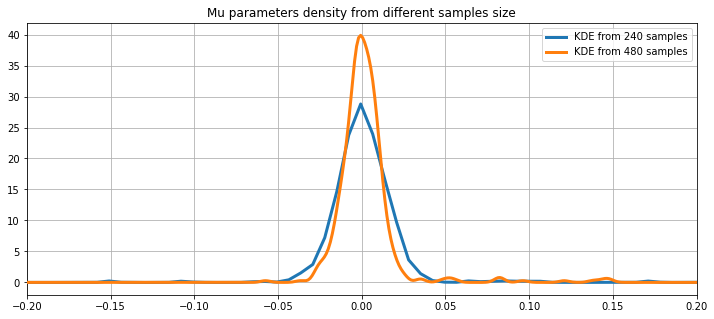

In [12]:
kde500 = sm.nonparametric.KDEUnivariate(sim500.iloc[:, 1].values)
kde500.fit()
kde1000 = sm.nonparametric.KDEUnivariate(sim1000.iloc[:, 1].values)
kde1000.fit()

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

ax.plot(kde500.support, kde500.density, lw = 3, label = 'KDE from 240 samples', zorder = 10)
ax.plot(kde1000.support, kde1000.density, lw = 3, label = 'KDE from 480 samples', zorder = 10)

plt.title('Mu parameters density from different samples size')
ax.set_xlim((-0.2, 0.2))
ax.legend(loc = 'best')
ax.grid(True, zorder = -5)

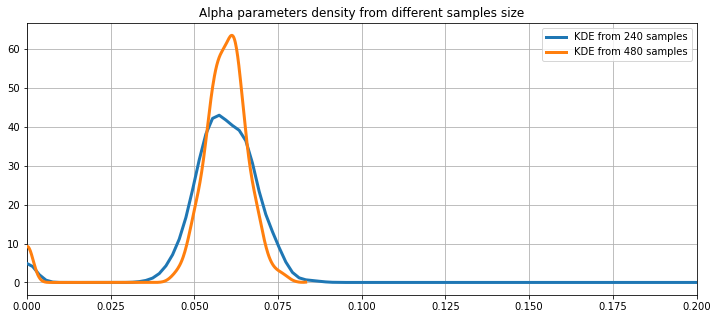

In [13]:
kde500 = sm.nonparametric.KDEUnivariate(sim500.iloc[:, 2].values)
kde500.fit()
kde1000 = sm.nonparametric.KDEUnivariate(sim1000.iloc[:, 2].values)
kde1000.fit()

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

ax.plot(kde500.support, kde500.density, lw = 3, label = 'KDE from 240 samples', zorder = 10)
ax.plot(kde1000.support, kde1000.density, lw = 3, label = 'KDE from 480 samples', zorder = 10)

plt.title('Alpha parameters density from different samples size')
ax.set_xlim((0.0, 0.2))
ax.legend(loc = 'best')
ax.grid(True, zorder = -5)

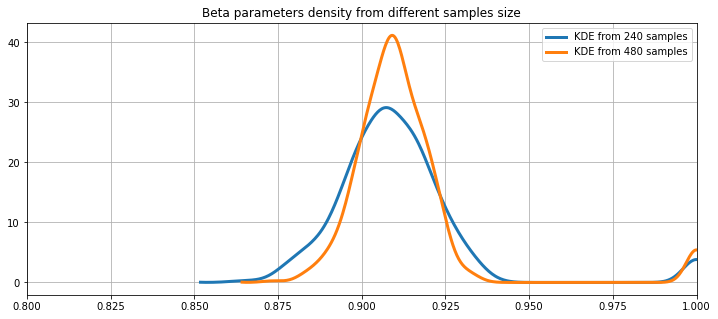

In [14]:
kde500 = sm.nonparametric.KDEUnivariate(sim500.iloc[:, 3].values)
kde500.fit()
kde1000 = sm.nonparametric.KDEUnivariate(sim1000.iloc[:, 3].values)
kde1000.fit()

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

ax.plot(kde500.support, kde500.density, lw = 3, label = 'KDE from 240 samples', zorder = 10)
ax.plot(kde1000.support, kde1000.density, lw = 3, label = 'KDE from 480 samples', zorder = 10)

plt.title('Beta parameters density from different samples size')
ax.set_xlim((0.8, 1.0))
ax.legend(loc = 'best')
ax.grid(True, zorder = -5)

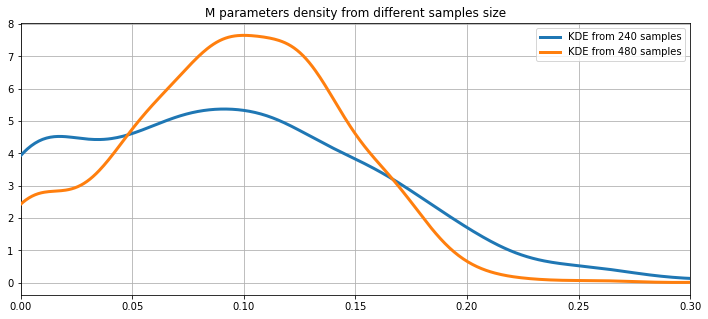

In [15]:
kde500 = sm.nonparametric.KDEUnivariate(sim500.iloc[:, 4].values)
kde500.fit()
kde1000 = sm.nonparametric.KDEUnivariate(sim1000.iloc[:, 4].values)
kde1000.fit()

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

ax.plot(kde500.support, kde500.density, lw = 3, label = 'KDE from 240 samples', zorder = 10)
ax.plot(kde1000.support, kde1000.density, lw = 3, label = 'KDE from 480 samples', zorder = 10)

plt.title('M parameters density from different samples size')
ax.set_xlim((0.0, 0.3))
ax.legend(loc = 'best')
ax.grid(True, zorder = -5)

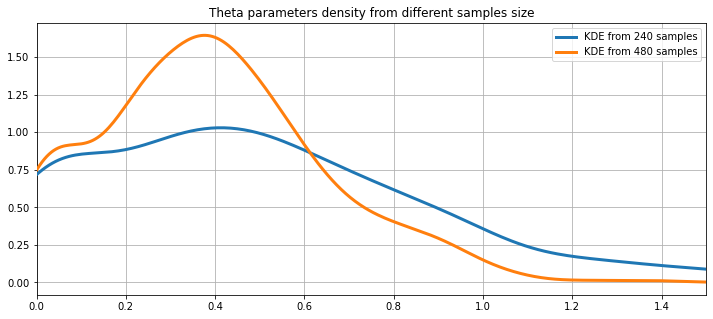

In [16]:
kde500 = sm.nonparametric.KDEUnivariate(sim500.iloc[:, 5].values)
kde500.fit()
kde1000 = sm.nonparametric.KDEUnivariate(sim1000.iloc[:, 5].values)
kde1000.fit()

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

ax.plot(kde500.support, kde500.density, lw = 3, label = 'KDE from 240 samples', zorder = 10)
ax.plot(kde1000.support, kde1000.density, lw = 3, label = 'KDE from 480 samples', zorder = 10)

plt.title('Theta parameters density from different samples size')
ax.set_xlim((0.0, 1.5))
ax.legend(loc = 'best')
ax.grid(True, zorder = -5)

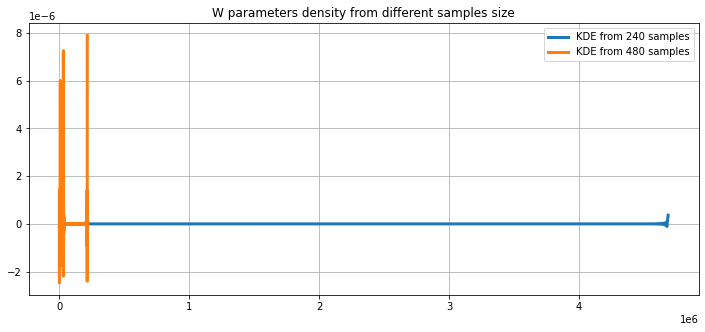

In [17]:
kde500 = sm.nonparametric.KDEUnivariate(sim500.iloc[:, 6].values)
kde500.fit()
kde1000 = sm.nonparametric.KDEUnivariate(sim1000.iloc[:, 6].values)
kde1000.fit()

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

ax.plot(kde500.support, kde500.density, lw = 3, label = 'KDE from 240 samples', zorder = 10)
ax.plot(kde1000.support, kde1000.density, lw = 3, label = 'KDE from 480 samples', zorder = 10)

plt.title('W parameters density from different samples size')
#ax.set_xlim((0.0, 10.0))
ax.legend(loc = 'best')
ax.grid(True, zorder = -5)